# Plotting QC metrics

Plotting QC metrics for TE001 (wild-type), TE002 (DT), TE006 (ablation), TE005 (haplo), TE013 (wild-type multiome).

### a) Import packages and data
Import packages and data and perform some minor preprocessing before plotting. Set thresholds for filtering out low quality cells.


In [1]:
### a) Import packages and data
# a.1) setup path to data-containing folder and savings
h5ad_path = "/Volumes/ac_lab_scratch/lz2841/ics-rebuttal/original/"
figures_dir = "/Volumes/ac_lab_scratch/lz2841/ics-rebuttal/figures/qc/"

# Set custom figure size for saving to PDF
pdf_figsize = (8.27 / 2, 11.69 / 5)  # Half width, 1/5th height of A4
dpi_selected=600


# a.2) setup filtering parameters
min_cells = 5
min_feats = 1000

min_nFeature_RNA = 1500
max_nFeature_RNA = 20000
max_nCount_RNA = 100000
mt_percent_threshold = 10



# a.3) Import packages
import sys
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import rc_context, ticker
import matplotlib.pyplot as plt
sc.settings.set_figure_params(frameon=False, dpi=100)


import warnings
warnings.simplefilter("ignore", category=UserWarning)

# a.4) Load counts data for all three experiments 
TE001_path = h5ad_path + "TE001-cells-original-data.h5ad" # homeostatic
TE002_path = h5ad_path + "TE002-cells-original-data.h5ad" # DT
TE006_path = h5ad_path + "TE006-cells-original-data.h5ad" # irradiated
TE005_path = h5ad_path + "TE005-cells-original-data.h5ad" # haplo
TE013_path = h5ad_path + "TE013-cells-original-data.h5ad" # homeostatic-multiome



print("Loading counts matrices for TE001 (homeostatic), TE002 (DT), TE006 (irradiated), TE005 (haplo) and TE013 (homeostatic-multiome)")
adata_TE001 = sc.read_h5ad(TE001_path) # load in object for TE001 
adata_TE002 = sc.read_h5ad(TE002_path) # load in object for TE002 
adata_TE006 = sc.read_h5ad(TE006_path) # load in object for TE006 
adata_TE005 = sc.read_h5ad(TE005_path) # load in object for TE005
adata_TE013 = sc.read_h5ad(TE013_path) # load in object for TE013 




adata_TE001.obs['sample'] = 'TE001'
adata_TE002.obs['sample'] = 'TE002'
adata_TE006.obs['sample'] = 'TE006'
adata_TE005.obs['sample'] = 'TE005'
adata_TE013.obs['sample'] = 'TE013'

Loading counts matrices for TE001 (homeostatic), TE002 (DT), TE006 (irradiated), TE005 (haplo) and TE013 (homeostatic-multiome)


### b) QC before filtering

Compute and display some metrics before filtering. 

In [2]:
#######################
# b.1) QC before filtering

# compute % mt genes
adata_TE001.var['mt'] = adata_TE001.var_names.str.startswith('mt-')  
adata_TE002.var['mt'] = adata_TE002.var_names.str.startswith('mt-')  
adata_TE006.var['mt'] = adata_TE006.var_names.str.startswith('mt-')  
adata_TE005.var['mt'] = adata_TE005.var_names.str.startswith('mt-')  
adata_TE013.var['mt'] = adata_TE013.var_names.str.startswith('mt-')  



sc.pp.calculate_qc_metrics(adata_TE001, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pp.calculate_qc_metrics(adata_TE002, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pp.calculate_qc_metrics(adata_TE006, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pp.calculate_qc_metrics(adata_TE005, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pp.calculate_qc_metrics(adata_TE013, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

#### B.1.1) n_genes_by_counts BEFORE FILTERING


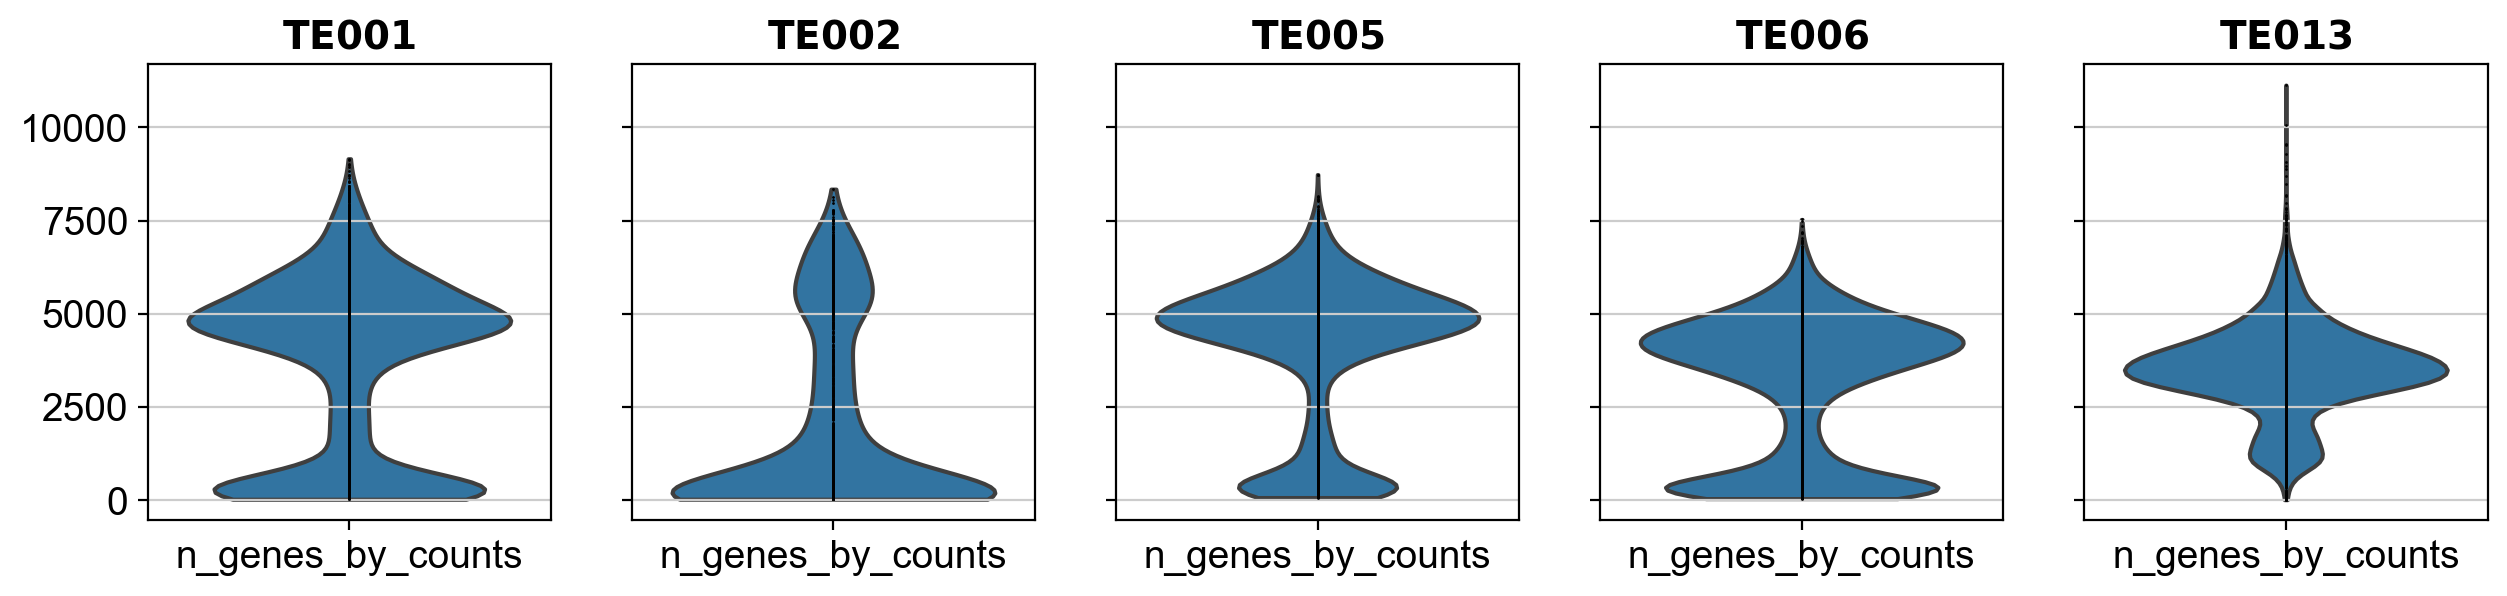

In [3]:
with rc_context(rc={'figure.figsize': (15, 3)}):
    fig, axes = plt.subplots(1, 5, sharey=True)

    # Loop through each AnnData object and plot a violin plot
    for i, (adata, sample_name) in enumerate(zip([adata_TE001, adata_TE002, adata_TE005, adata_TE006, adata_TE013], ['TE001', 'TE002', 'TE005', 'TE006', 'TE013'])):
        sc.pl.violin(adata, keys='n_genes_by_counts', ax=axes[i],jitter=0,show=False)
        axes[i].set_title(fr'$\bf{{{sample_name}}}$')  # Using LaTeX for bold formatting

        # Remove a and y-axis title
        axes[i].set_xlabel('')    
        axes[i].set_ylabel('')    

    # Save the plot to a file (adjust the filename and format as needed)
    counts_fig = figures_dir + "preFilt-n_genes_by_counts.pdf"
    plt.savefig(counts_fig, dpi=dpi_selected)

#fig.text(0.5, 0.02, 'n_genes_by_counts', ha='center')

# Show the plots
#plt.show()

#### B.1.2) total_counts BEFORE FILTERING

Text(0.5, 0.02, 'total_counts')

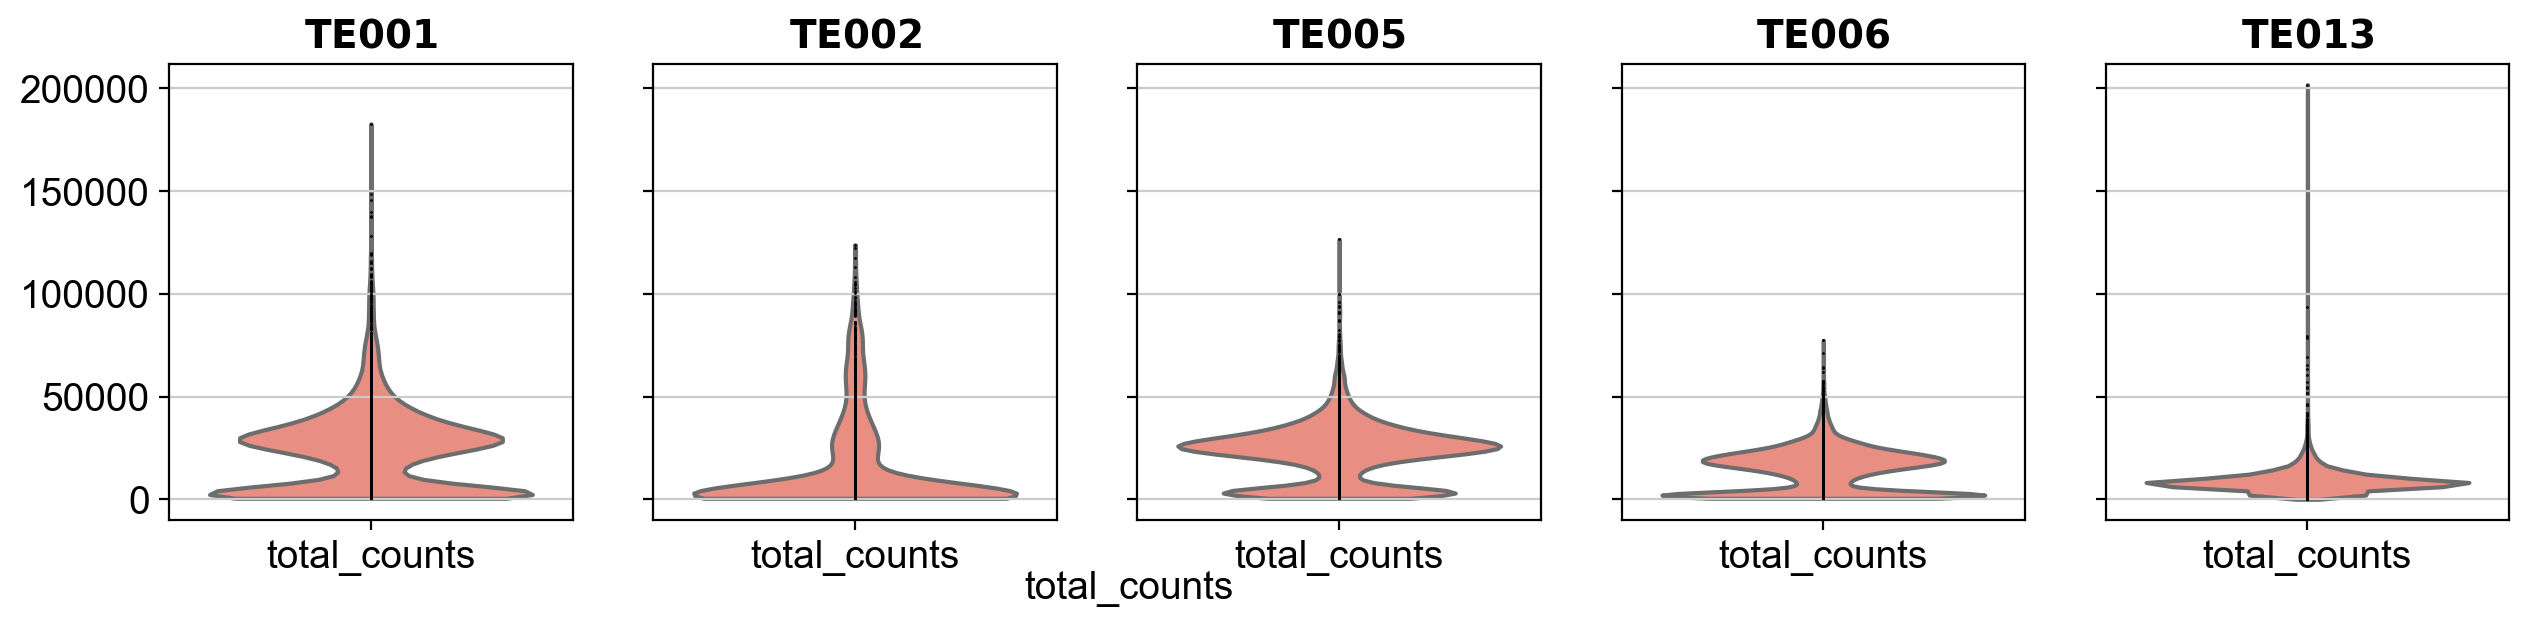

In [4]:
with rc_context(rc={'figure.figsize': (15, 3)}):
    fig, axes = plt.subplots(1, 5, sharey=True)

    # Loop through each AnnData object and plot a violin plot
    for i, (adata, sample_name) in enumerate(zip([adata_TE001, adata_TE002, adata_TE005, adata_TE006, adata_TE013], ['TE001', 'TE002', 'TE005', 'TE006', 'TE013'])):
        sc.pl.violin(adata, keys='total_counts', ax=axes[i],jitter=0,show=False, color="salmon")
        axes[i].set_title(fr'$\bf{{{sample_name}}}$')  # Using LaTeX for bold formatting

        # Remove a and y-axis title
        axes[i].set_xlabel('')    
        axes[i].set_ylabel('')    

    # Save the plot to a file (adjust the filename and format as needed)
    counts_fig = figures_dir + "preFilt-total_counts.pdf"
    plt.savefig(counts_fig, dpi=dpi_selected)

fig.text(0.5, 0.02, 'total_counts', ha='center')

# Show the plots
#plt.show()

#### B.1.3) pct_counts_mt BEFORE FILTERING

Text(0.5, 0.02, 'pct_counts_mt')

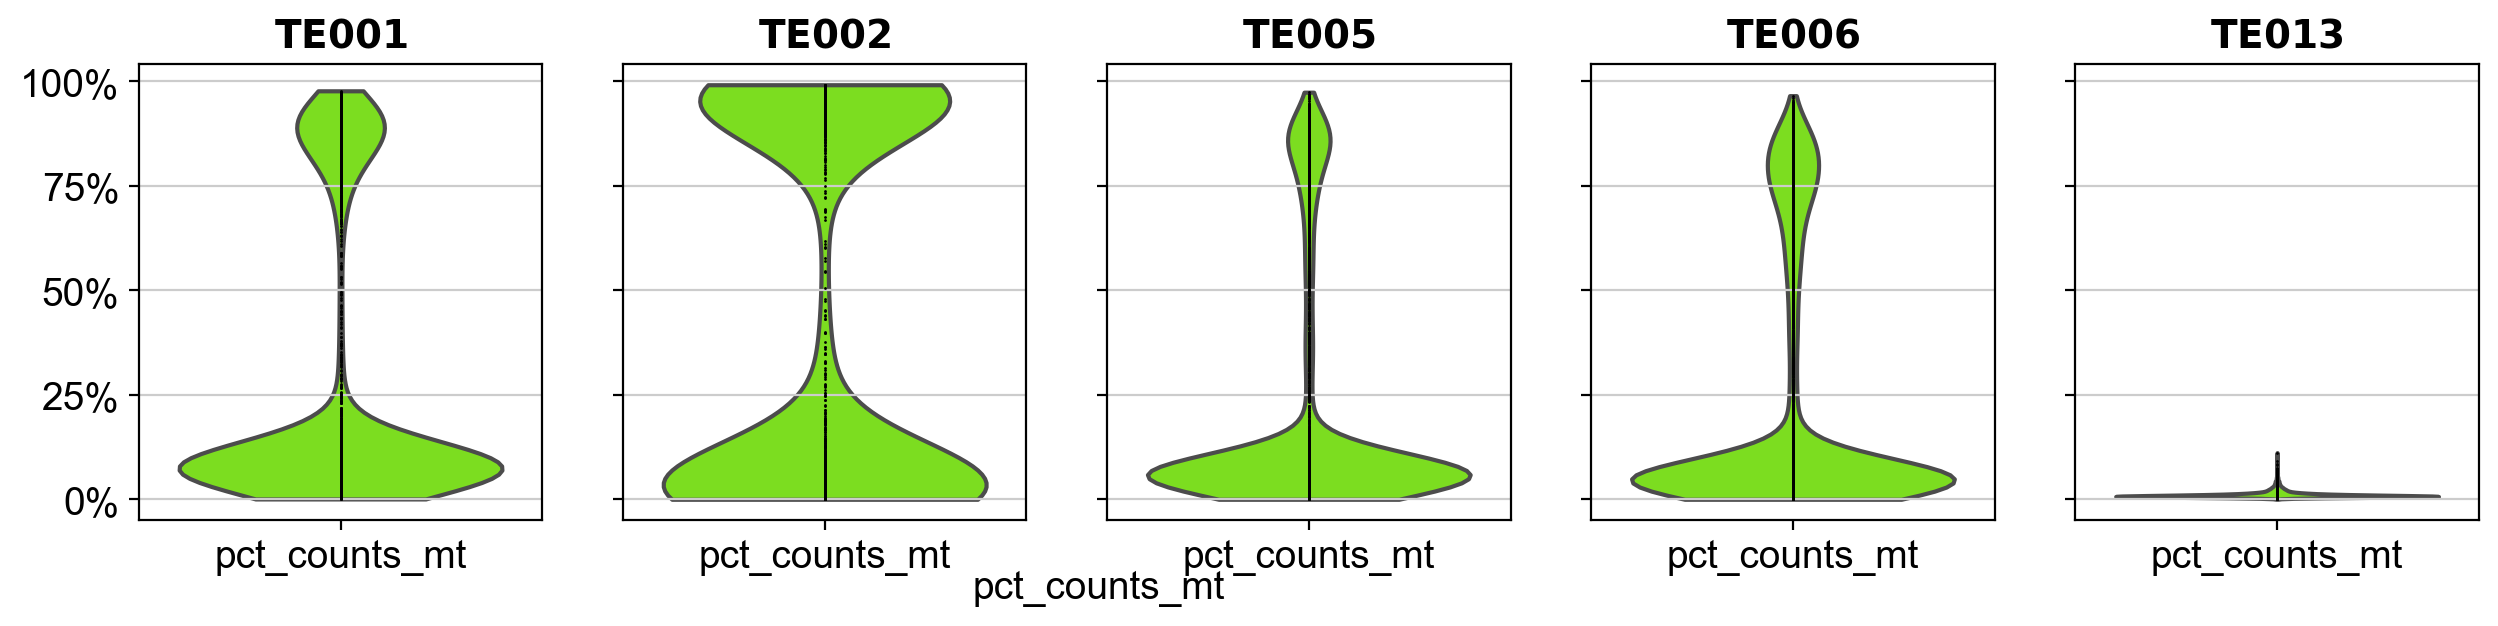

In [5]:
with rc_context(rc={'figure.figsize': (15, 3)}):
    fig, axes = plt.subplots(1, 5, sharey=True)

    # Loop through each AnnData object and plot a violin plot
    for i, (adata, sample_name) in enumerate(zip([adata_TE001, adata_TE002, adata_TE005, adata_TE006, adata_TE013], ['TE001', 'TE002', 'TE005', 'TE006', 'TE013'])):
        sc.pl.violin(adata, keys='pct_counts_mt', ax=axes[i],jitter=0,show=False, color="lawngreen")
        axes[i].set_title(fr'$\bf{{{sample_name}}}$')  # Using LaTeX for bold formatting

        # Remove a and y-axis title
        axes[i].set_xlabel('')    
        axes[i].set_ylabel('')    
        axes[i].yaxis.set_major_formatter(ticker.PercentFormatter(100.0, decimals=0))


    # Save the plot to a file (adjust the filename and format as needed)
    counts_fig = figures_dir + "preFilt-pct_counts_mt.pdf"
    plt.savefig(counts_fig, dpi=dpi_selected)

fig.text(0.5, 0.02, 'pct_counts_mt', ha='center')

# Show the plots
#plt.show()

#### B.1.4) corr_1 BEFORE FILTERING


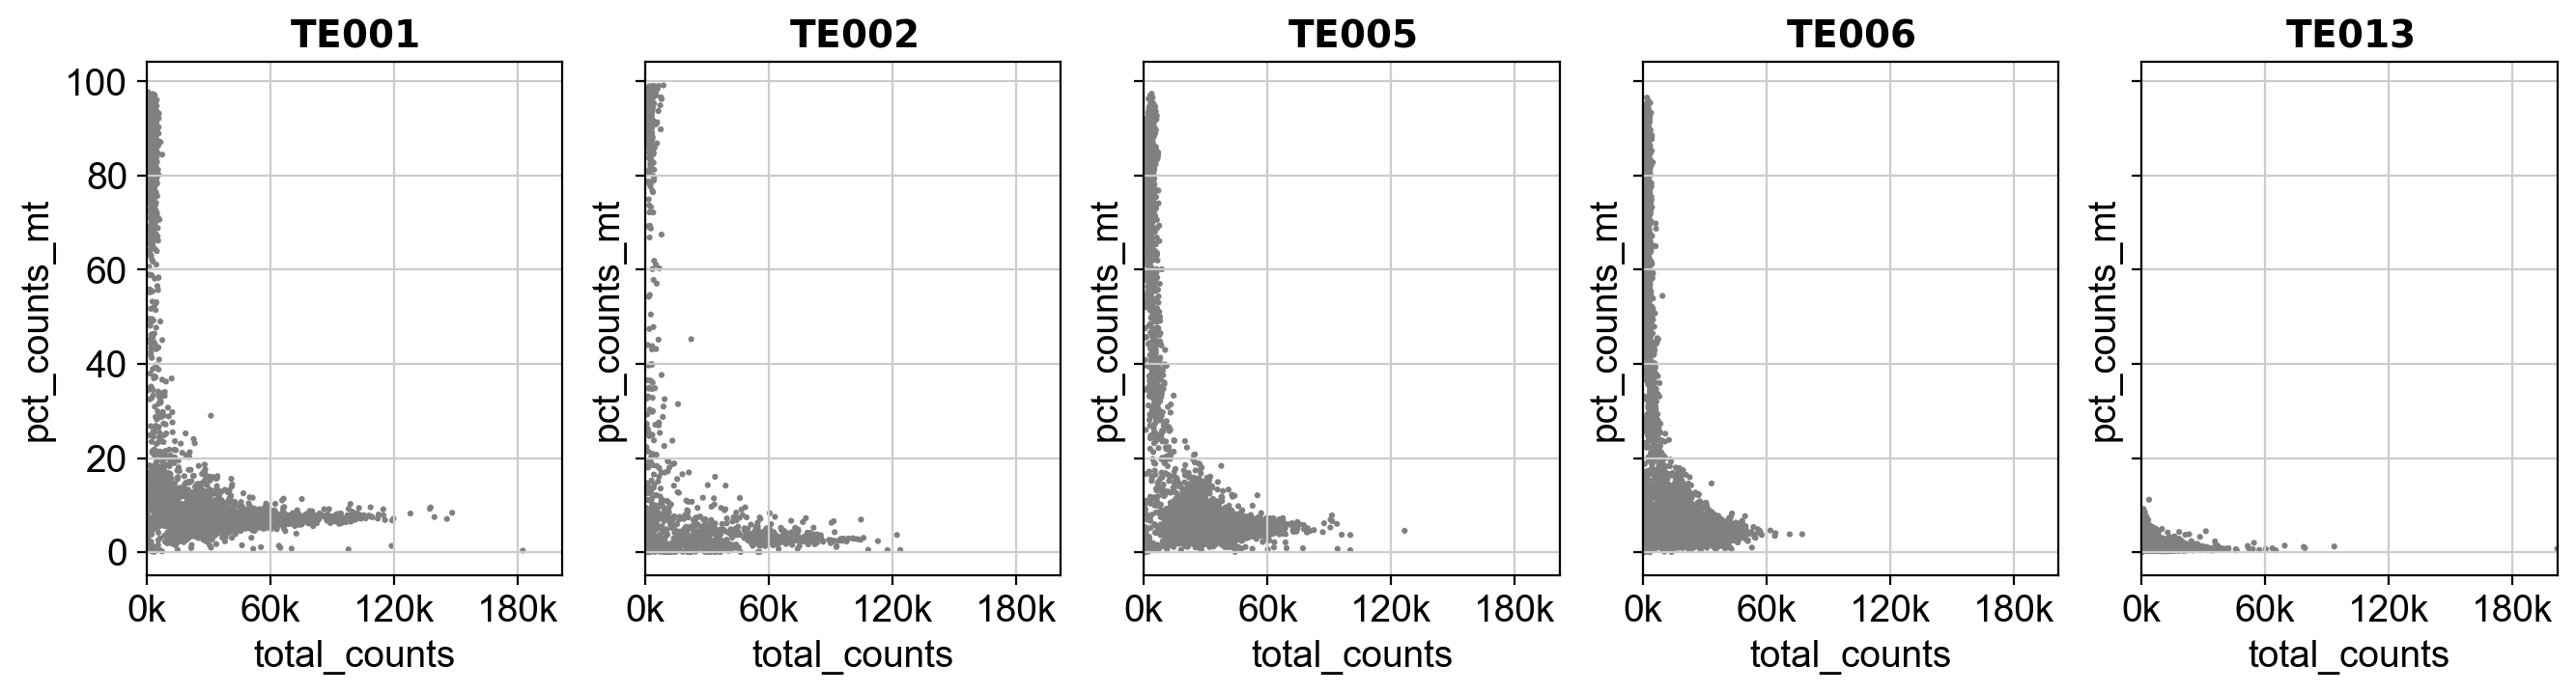

In [6]:
# Define the custom figure size for saving to PDF

# Set common x-axis limits
x_axis_limits = (0, max(max(adata.obs['total_counts']) for adata in [adata_TE001, adata_TE002, adata_TE005, adata_TE006, adata_TE013]))

# Plotting scatter plots side by side with shared y-axis
with rc_context(rc={'figure.figsize': (16, 3.5)}):
    fig, axes = plt.subplots(1, 5, sharey=True)

    # Loop through each AnnData object and plot a scatter plot
    for i, (adata, sample_name) in enumerate(zip([adata_TE001, adata_TE002, adata_TE005, adata_TE006, adata_TE013], ['TE001', 'TE002', 'TE005', 'TE006', 'TE013'])):
        pt_size = 20
        sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt', ax=axes[i], show=False,size=pt_size)
        axes[i].set_title(fr'$\bf{{{sample_name}}}$')  # Using LaTeX for bold formatting

        # Set x-axis limits
        axes[i].set_xlim(x_axis_limits)

        # Format x-axis ticks as 100k nomenclature
        axes[i].xaxis.set_major_locator(ticker.MaxNLocator(nbins=4))
        axes[i].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x / 1000:.0f}k'))

    # Save the plot to a file (adjust the filename and format as needed)
    counts_fig = figures_dir + "preFilt-corr_1.pdf"
    plt.savefig(counts_fig, dpi=dpi_selected)

# Show the plots
#plt.show()

#### B.1.5) corr_2 BEFORE FILTERING


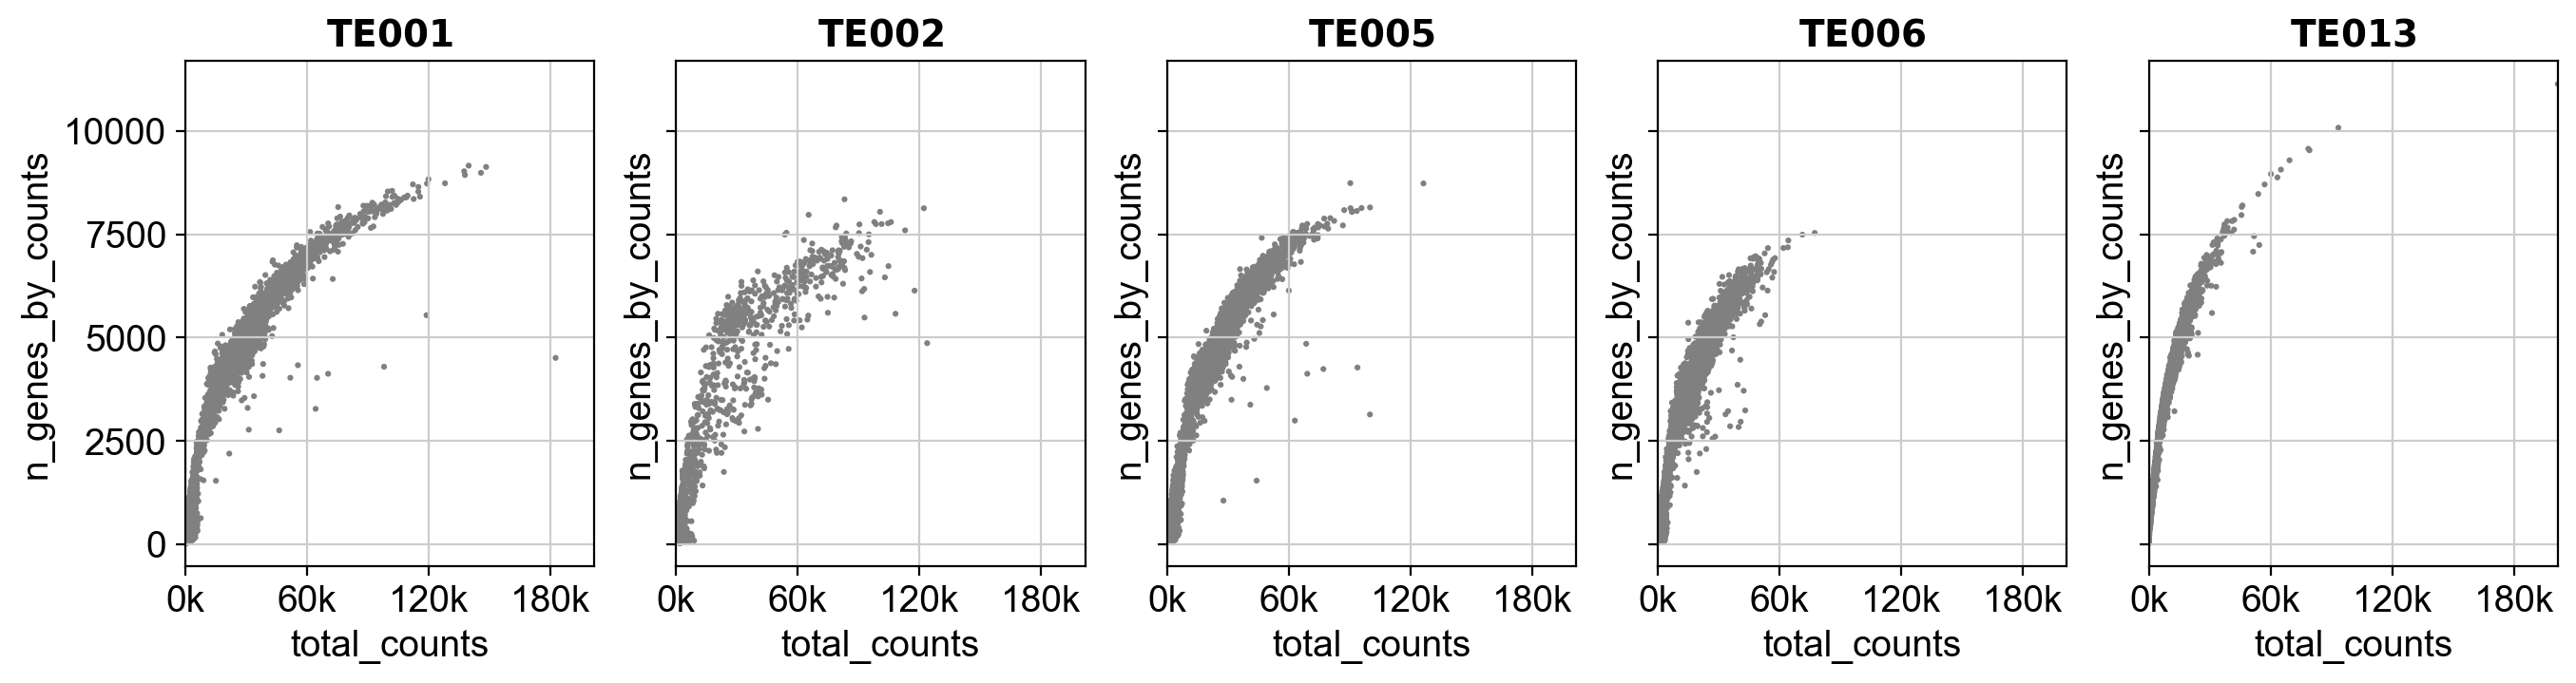

In [7]:
# Set common x-axis limits
x_axis_limits = (0, max(max(adata.obs['total_counts']) for adata in [adata_TE001, adata_TE002, adata_TE005, adata_TE006, adata_TE013]))

# Plotting scatter plots side by side with shared y-axis
with rc_context(rc={'figure.figsize': (16, 3.5)}):
    fig, axes = plt.subplots(1,5, sharey=True)

    # Loop through each AnnData object and plot a scatter plot
    for i, (adata, sample_name) in enumerate(zip([adata_TE001, adata_TE002, adata_TE005, adata_TE006, adata_TE013], ['TE001', 'TE002', 'TE005', 'TE006', 'TE013'])):
        sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts', ax=axes[i], show=False,size=pt_size)
        axes[i].set_title(fr'$\bf{{{sample_name}}}$')  # Using LaTeX for bold formatting

        # Set x-axis limits
        axes[i].set_xlim(x_axis_limits)

        # Format x-axis ticks as 100k nomenclature
        axes[i].xaxis.set_major_locator(ticker.MaxNLocator(nbins=4))
        axes[i].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x / 1000:.0f}k'))

    # Save the plot to a file (adjust the filename and format as needed)
    counts_fig = figures_dir + "preFilt-corr_2.pdf"
    plt.savefig(counts_fig, dpi=dpi_selected)

# Show the plots
#plt.show()

### c.1) QC after filtering

Filter out low quality cells and visualize results.


In [8]:
# c.1.1) filtering TE001 (homeostatic)
sc.pp.filter_cells(adata_TE001, min_genes=min_feats) # cells that have at least min_feats genes
sc.pp.filter_genes(adata_TE001, min_cells=min_cells) # genes that are present in at least nin_cells

adata_TE001_filtered = adata_TE001[((adata_TE001.obs.n_genes_by_counts > min_nFeature_RNA) &
                          (adata_TE001.obs.n_genes_by_counts < max_nFeature_RNA)), :] # filtering based on n_genes_by_counts
adata_TE001_filtered = adata_TE001_filtered[adata_TE001_filtered.obs.total_counts < max_nCount_RNA,:] # filtering based on nCount_RNA
adata_TE001_filtered = adata_TE001_filtered[adata_TE001_filtered.obs.pct_counts_mt < mt_percent_threshold, :] # filtering based on mt_percent_threshold

sc.pp.calculate_qc_metrics(adata_TE001_filtered, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)


# c.1.2) filtering TE002 (DT)
sc.pp.filter_cells(adata_TE002, min_genes=min_feats) # cells that have at least min_feats genes
sc.pp.filter_genes(adata_TE002, min_cells=min_cells) # genes that are present in at least nin_cells

adata_TE002_filtered = adata_TE002[((adata_TE002.obs.n_genes_by_counts > min_nFeature_RNA) &
                          (adata_TE002.obs.n_genes_by_counts < max_nFeature_RNA)), :] # filtering based on n_genes_by_counts
adata_TE002_filtered = adata_TE002_filtered[adata_TE002_filtered.obs.total_counts < max_nCount_RNA,:] # filtering based on nCount_RNA
adata_TE002_filtered = adata_TE002_filtered[adata_TE002_filtered.obs.pct_counts_mt < mt_percent_threshold, :] # filtering based on mt_percent_threshold

sc.pp.calculate_qc_metrics(adata_TE002_filtered, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

# c.1.3) filtering TE005 (haplo)
sc.pp.filter_cells(adata_TE005, min_genes=min_feats) # cells that have at least min_feats genes
sc.pp.filter_genes(adata_TE005, min_cells=min_cells) # genes that are present in at least nin_cells

adata_TE005_filtered = adata_TE005[((adata_TE005.obs.n_genes_by_counts > min_nFeature_RNA) &
                          (adata_TE005.obs.n_genes_by_counts < max_nFeature_RNA)), :] # filtering based on n_genes_by_counts
adata_TE005_filtered = adata_TE005_filtered[adata_TE005_filtered.obs.total_counts < max_nCount_RNA,:] # filtering based on nCount_RNA
adata_TE005_filtered = adata_TE005_filtered[adata_TE005_filtered.obs.pct_counts_mt < mt_percent_threshold, :] # filtering based on mt_percent_threshold

sc.pp.calculate_qc_metrics(adata_TE005_filtered, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

# c.1.4) filtering TE006 (irradiated)
sc.pp.filter_cells(adata_TE006, min_genes=min_feats) # cells that have at least min_feats genes
sc.pp.filter_genes(adata_TE006, min_cells=min_cells) # genes that are present in at least nin_cells

adata_TE006_filtered = adata_TE006[((adata_TE006.obs.n_genes_by_counts > min_nFeature_RNA) &
                          (adata_TE006.obs.n_genes_by_counts < max_nFeature_RNA)), :] # filtering based on n_genes_by_counts
adata_TE006_filtered = adata_TE006_filtered[adata_TE006_filtered.obs.total_counts < max_nCount_RNA,:] # filtering based on nCount_RNA
adata_TE006_filtered = adata_TE006_filtered[adata_TE006_filtered.obs.pct_counts_mt < mt_percent_threshold, :] # filtering based on mt_percent_threshold

sc.pp.calculate_qc_metrics(adata_TE006_filtered, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)


# c.1.5) filtering TE013 (homeostatic-multiome)
sc.pp.filter_cells(adata_TE013, min_genes=min_feats) # cells that have at least min_feats genes
sc.pp.filter_genes(adata_TE013, min_cells=min_cells) # genes that are present in at least nin_cells

adata_TE013_filtered = adata_TE013[((adata_TE013.obs.n_genes_by_counts > min_nFeature_RNA) &
                          (adata_TE013.obs.n_genes_by_counts < max_nFeature_RNA)), :] # filtering based on n_genes_by_counts
adata_TE013_filtered = adata_TE013_filtered[adata_TE013_filtered.obs.total_counts < max_nCount_RNA,:] # filtering based on nCount_RNA
adata_TE013_filtered = adata_TE013_filtered[adata_TE013_filtered.obs.pct_counts_mt < mt_percent_threshold, :] # filtering based on mt_percent_threshold

sc.pp.calculate_qc_metrics(adata_TE013_filtered, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)


### d.1) PLOTTING QC AFTER FILTERING
Plotting distribution for filtered cells

### D.1.1) n_genes_by_counts AFTER FILTERING

Text(0.5, 0.02, 'n_genes_by_counts')

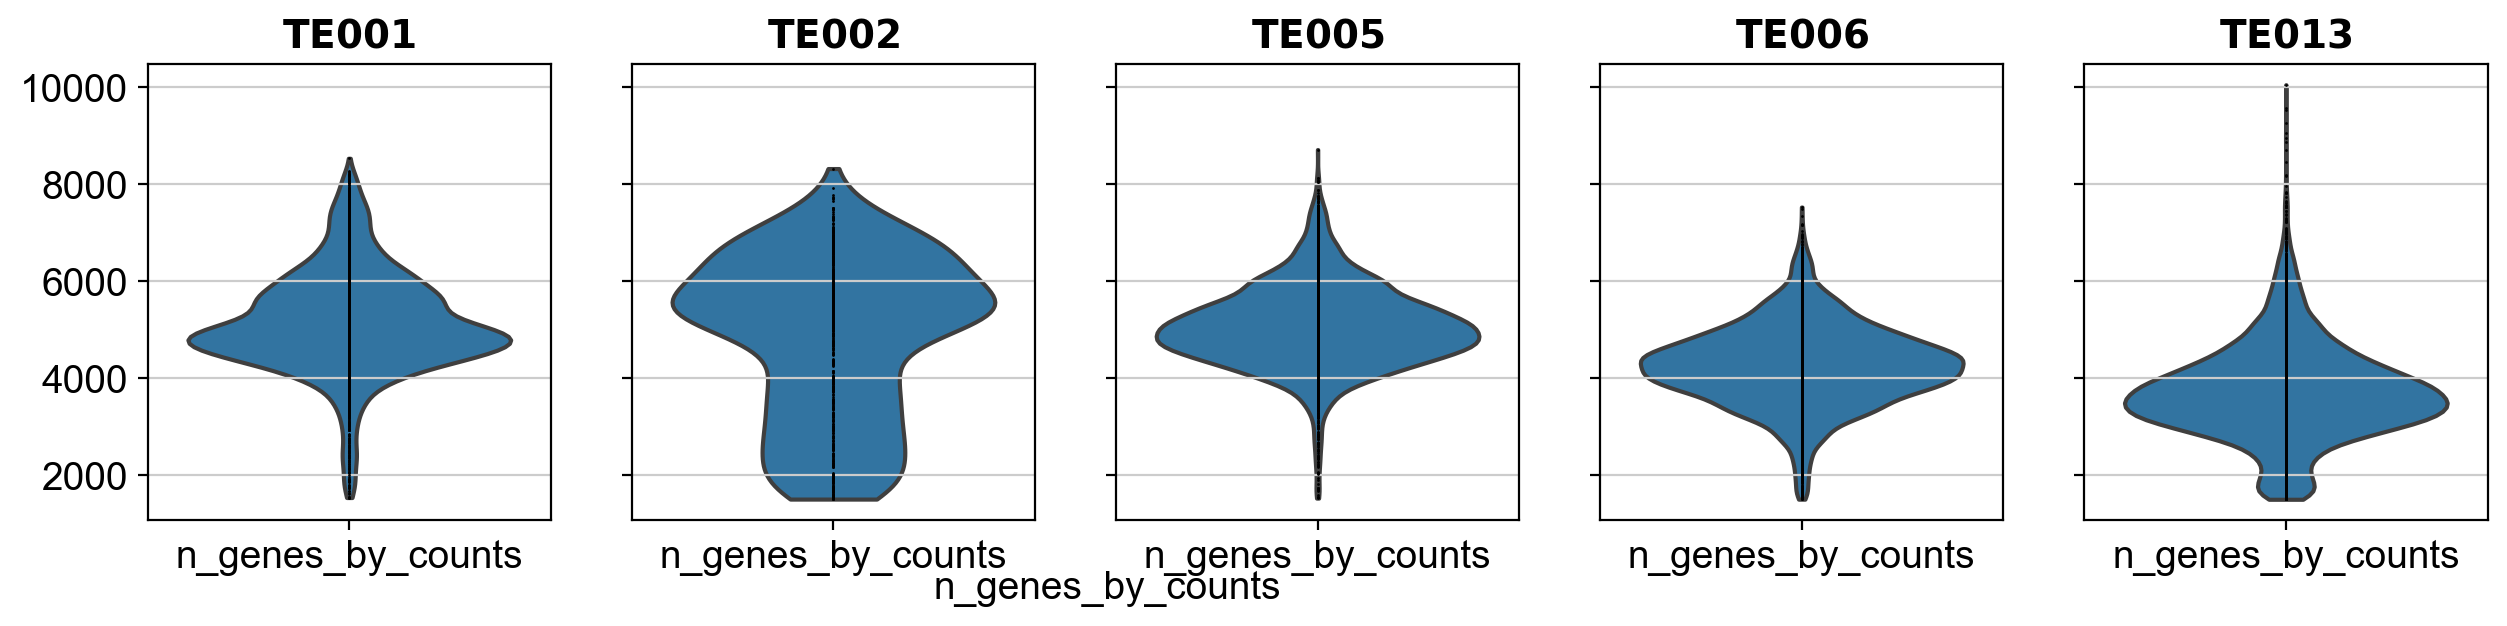

In [9]:
with rc_context(rc={'figure.figsize': (15, 3)}):
    fig, axes = plt.subplots(1, 5, sharey=True)

    # Loop through each AnnData object and plot a violin plot
    for i, (adata, sample_name) in enumerate(zip([adata_TE001_filtered, adata_TE002_filtered, adata_TE005_filtered, adata_TE006_filtered, adata_TE013_filtered], ['TE001', 'TE002', 'TE005', 'TE006', 'TE013'])):
        sc.pl.violin(adata, keys='n_genes_by_counts', ax=axes[i],jitter=0,show=False)
        axes[i].set_title(fr'$\bf{{{sample_name}}}$')  # Using LaTeX for bold formatting

        # Remove a and y-axis title
        axes[i].set_xlabel('')    
        axes[i].set_ylabel('')    

    # Save the plot to a file (adjust the filename and format as needed)
    counts_fig = figures_dir + "postFilt-n_genes_by_counts.pdf"
    plt.savefig(counts_fig, dpi=dpi_selected)

fig.text(0.5, 0.02, 'n_genes_by_counts', ha='center')

# Show the plots
#plt.show()

#### D.1.2) total_counts AFTER FILTERING


Text(0.5, 0.02, 'total_counts')

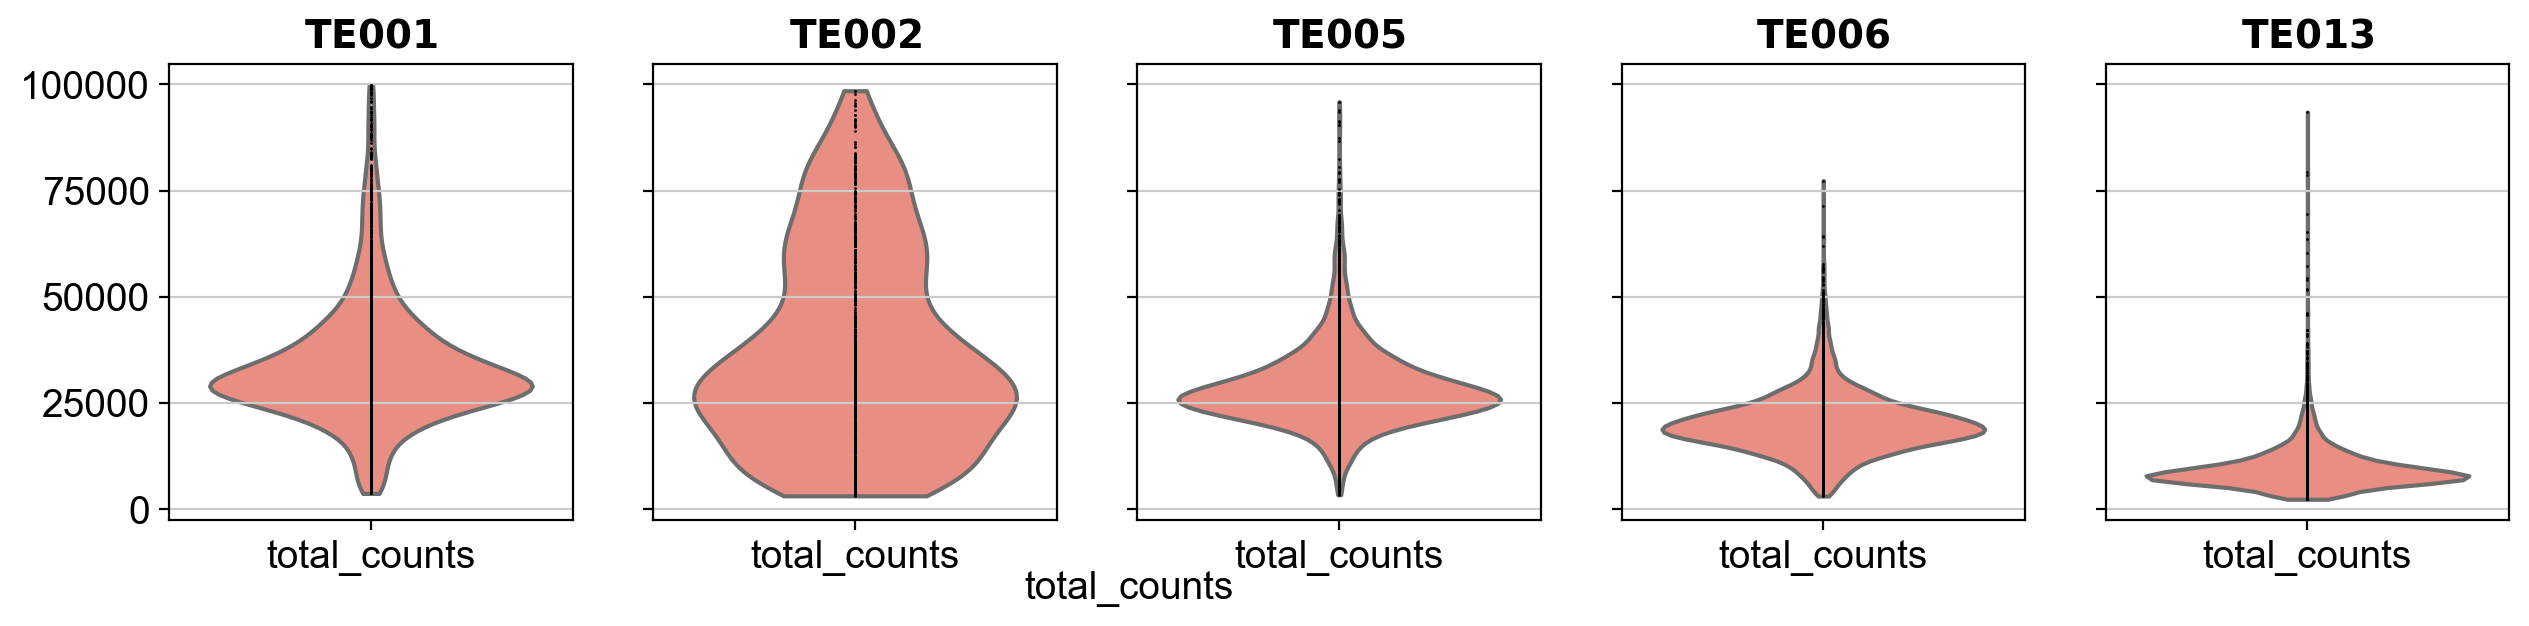

In [10]:
with rc_context(rc={'figure.figsize': (15, 3)}):
    fig, axes = plt.subplots(1, 5, sharey=True)

    # Loop through each AnnData object and plot a violin plot
    for i, (adata, sample_name) in enumerate(zip([adata_TE001_filtered, adata_TE002_filtered, adata_TE005_filtered, adata_TE006_filtered, adata_TE013_filtered], ['TE001', 'TE002', 'TE005', 'TE006', 'TE013'])):
        sc.pl.violin(adata, keys='total_counts', ax=axes[i],jitter=0,show=False, color="salmon")
        axes[i].set_title(fr'$\bf{{{sample_name}}}$')  # Using LaTeX for bold formatting

        # Remove a and y-axis title
        axes[i].set_xlabel('')    
        axes[i].set_ylabel('')    

    # Save the plot to a file (adjust the filename and format as needed)
    counts_fig = figures_dir + "postFilt-total_counts.pdf"
    plt.savefig(counts_fig, dpi=dpi_selected)

fig.text(0.5, 0.02, 'total_counts', ha='center')

# Show the plots
#plt.show()



#### D.1.3) pct_counts_mt POST FILTERING


Text(0.5, 0.02, 'pct_counts_mt')

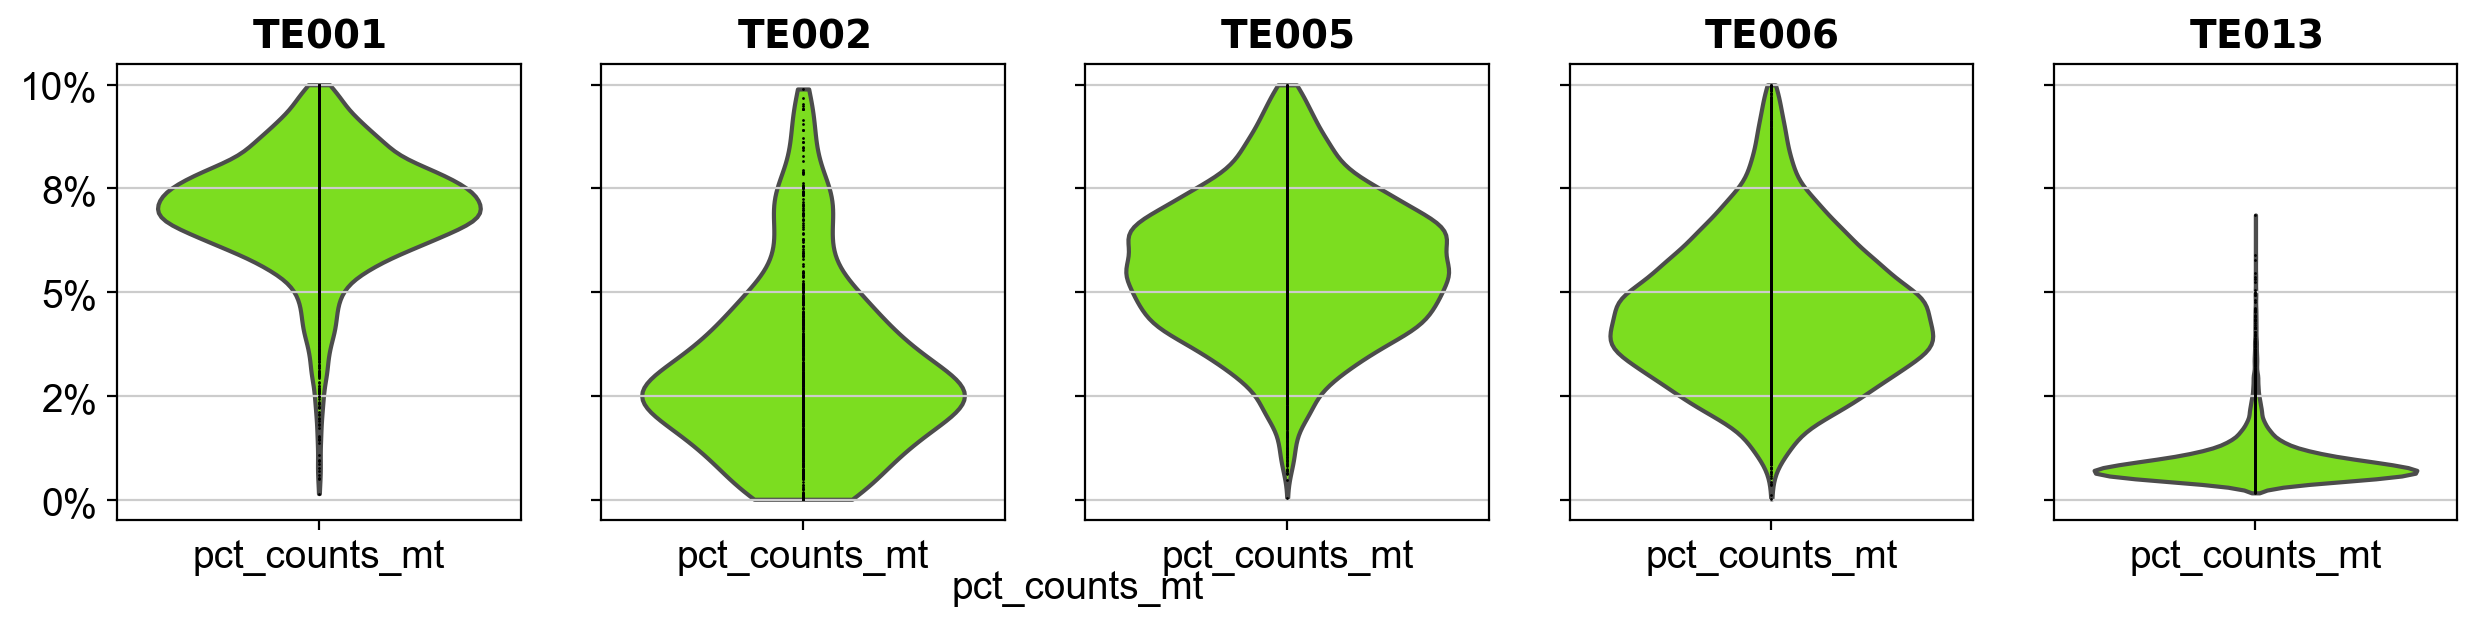

In [11]:
with rc_context(rc={'figure.figsize': (15, 3)}):
    fig, axes = plt.subplots(1, 5, sharey=True)

    # Loop through each AnnData object and plot a violin plot
    for i, (adata, sample_name) in enumerate(zip([adata_TE001_filtered, adata_TE002_filtered, adata_TE005_filtered, adata_TE006_filtered, adata_TE013_filtered], ['TE001', 'TE002', 'TE005', 'TE006', 'TE013'])):
        sc.pl.violin(adata, keys='pct_counts_mt', ax=axes[i],jitter=0,show=False, color="lawngreen")
        axes[i].set_title(fr'$\bf{{{sample_name}}}$')  # Using LaTeX for bold formatting

        # Remove a and y-axis title
        axes[i].set_xlabel('')    
        axes[i].set_ylabel('')    
        axes[i].yaxis.set_major_formatter(ticker.PercentFormatter(100.0, decimals=0))


    # Save the plot to a file (adjust the filename and format as needed)
    counts_fig = figures_dir + "postFilt-pct_counts_mt.pdf"
    plt.savefig(counts_fig, dpi=dpi_selected)

fig.text(0.5, 0.02, 'pct_counts_mt', ha='center')

# Show the plots
#plt.show()

### D.1.4) corr_1 POST FILTERING

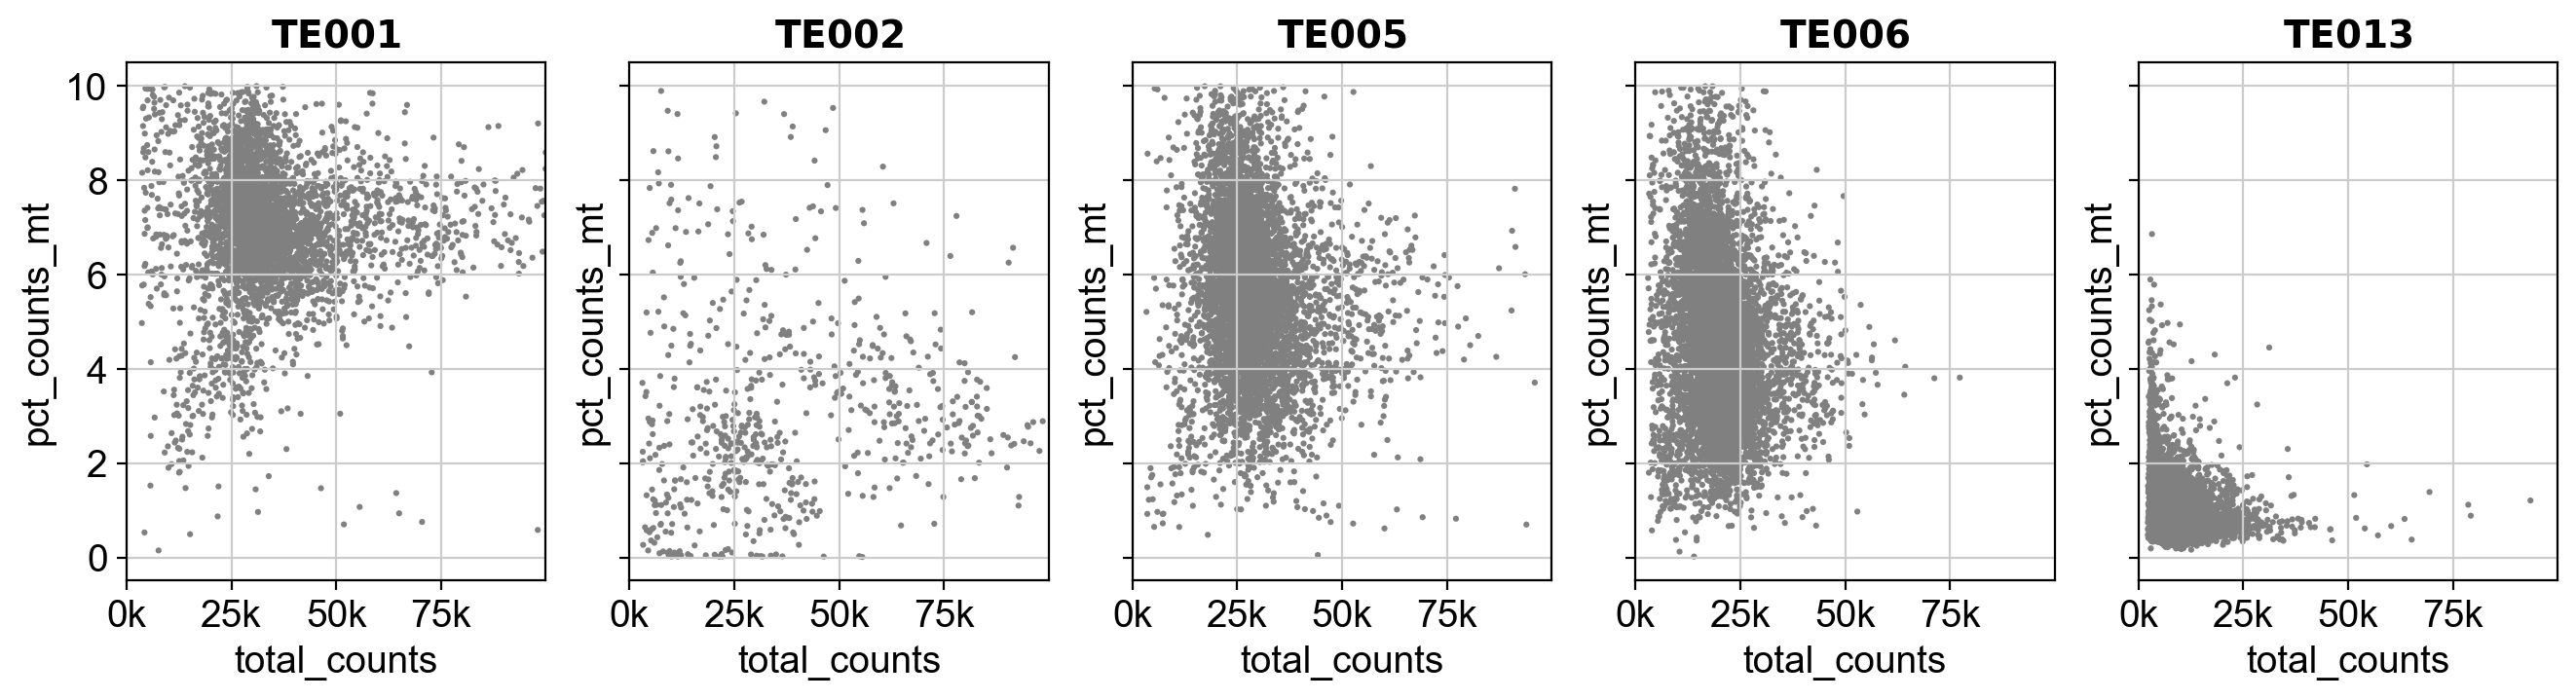

In [12]:
# Define the custom figure size for saving to PDF

# Set common x-axis limits
x_axis_limits = (0, max(max(adata.obs['total_counts']) for adata in [adata_TE001_filtered, adata_TE002_filtered, adata_TE005_filtered, adata_TE006_filtered, adata_TE013_filtered]))

# Plotting scatter plots side by side with shared y-axis
with rc_context(rc={'figure.figsize': (16, 3.5)}):
    fig, axes = plt.subplots(1, 5, sharey=True)

    # Loop through each AnnData object and plot a scatter plot
    for i, (adata, sample_name) in enumerate(zip([adata_TE001_filtered, adata_TE002_filtered, adata_TE005_filtered, adata_TE006_filtered, adata_TE013_filtered], ['TE001', 'TE002', 'TE005', 'TE006', 'TE013'])):
        pt_size = 20
        sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt', ax=axes[i], show=False, size=pt_size)
        axes[i].set_title(fr'$\bf{{{sample_name}}}$')  # Using LaTeX for bold formatting

        # Set x-axis limits
        axes[i].set_xlim(x_axis_limits)

        # Format x-axis ticks as 100k nomenclature
        axes[i].xaxis.set_major_locator(ticker.MaxNLocator(nbins=4))
        axes[i].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x / 1000:.0f}k'))

    # Save the plot to a file (adjust the filename and format as needed)
    counts_fig = figures_dir + "postFilt-corr_1.pdf"
    plt.savefig(counts_fig, dpi=dpi_selected)

# Show the plots
#plt.show()



#### D.1.5) corr_2 POST FILTERING


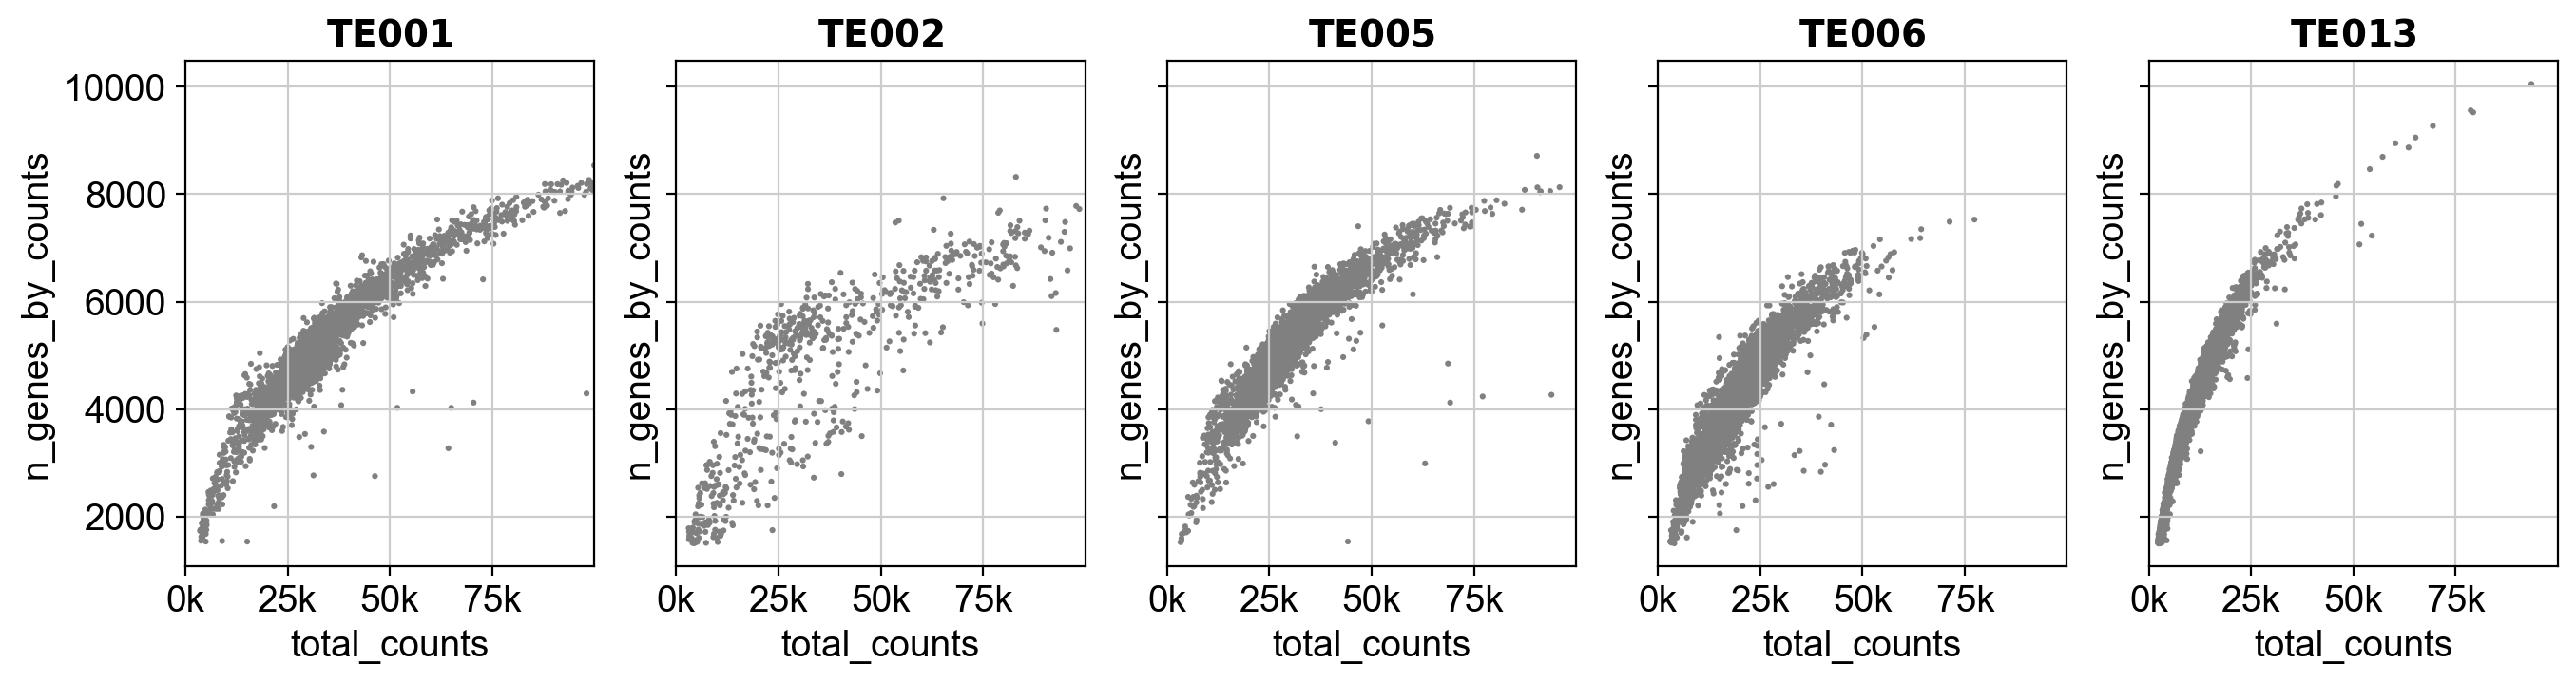

In [13]:
# Set common x-axis limits
x_axis_limits = (0, max(max(adata.obs['total_counts']) for adata in [adata_TE001_filtered, adata_TE002_filtered, adata_TE005_filtered, adata_TE006_filtered, adata_TE013_filtered]))

# Plotting scatter plots side by side with shared y-axis
with rc_context(rc={'figure.figsize': (16, 3.5)}):
    fig, axes = plt.subplots(1, 5, sharey=True)

    # Loop through each AnnData object and plot a scatter plot
    for i, (adata, sample_name) in enumerate(zip([adata_TE001_filtered, adata_TE002_filtered, adata_TE005_filtered, adata_TE006_filtered, adata_TE013_filtered], ['TE001', 'TE002', 'TE005', 'TE006', 'TE013'])):
        pt_size = 20
        sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts', ax=axes[i], show=False,size=pt_size)
        axes[i].set_title(fr'$\bf{{{sample_name}}}$')  # Using LaTeX for bold formatting

        # Set x-axis limits
        axes[i].set_xlim(x_axis_limits)

        # Format x-axis ticks as 100k nomenclature
        axes[i].xaxis.set_major_locator(ticker.MaxNLocator(nbins=4))
        axes[i].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x / 1000:.0f}k'))

    # Save the plot to a file (adjust the filename and format as needed)
    counts_fig = figures_dir + "postFilt-corr_2.pdf"
    plt.savefig(counts_fig, dpi=dpi_selected)

# Show the plots
#plt.show()

